In [34]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump, load

In [35]:
import os

# Use the "archive" folder as the dataset path
data_dir = r"C:\Users\Shreya\Desktop\f\archive"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Verify if train and test directories exist
if os.path.exists(train_dir) and os.path.exists(test_dir):
    print("✅ Dataset path is correct!")
else:
    print("❌ Error: Train/Test folders not found. Check the path again.")


✅ Dataset path is correct!


In [36]:
# Emotion labels
emotions = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
label_map = {emotion: idx for idx, emotion in enumerate(emotions)}


In [37]:
def load_data(folder_path, limit=1000):  # Limit to 1000 images for testing
    X, y = [], []
    labels = os.listdir(folder_path)  # List emotion folders (e.g., happy, sad)

    for label in labels:
        label_path = os.path.join(folder_path, label)
        if not os.path.isdir(label_path):
            continue  # Skip if it's not a folder
        
        count = 0
        for img_name in os.listdir(label_path):
            if count >= limit:  # Stop after processing 'limit' images
                break
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip corrupted images

            img = cv2.resize(img, (48, 48))  # Resize to 48x48
            X.append(img.flatten())  # Flatten image to a 1D array
            y.append(label)
            count += 1  # Increase count

    return np.array(X), np.array(y)

In [38]:
train_dir = r"C:\Users\Shreya\Desktop\f\archive\train"
test_dir = r"C:\Users\Shreya\Desktop\f\archive\test"


In [39]:

# ✅ Load only 100 images for training and 100 for testing
train_dir = r"C:\Users\Shreya\Desktop\f\archive\train"
test_dir = r"C:\Users\Shreya\Desktop\f\archive\test"

X_train, y_train = load_data(train_dir, limit=100)
X_test, y_test = load_data(test_dir, limit=100)

print("✅ Data loaded successfully!")
print(f"Train data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels: {y_test.shape}")



✅ Data loaded successfully!
Train data shape: (700, 2304), Labels: (700,)
Test data shape: (700, 2304), Labels: (700,)


In [40]:
# Train an SVM classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [41]:
# Save model
model_path = "emotion_svm_model.joblib"
dump(svm_model, model_path)
print(f"Model saved to {model_path}")

Model saved to emotion_svm_model.joblib


In [42]:
# Evaluate on test data
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=emotions))


Test Accuracy: 0.27
              precision    recall  f1-score   support

       angry       0.18      0.25      0.21       100
   disgusted       0.33      0.45      0.38       100
     fearful       0.17      0.15      0.16       100
       happy       0.45      0.43      0.44       100
     neutral       0.24      0.22      0.23       100
         sad       0.17      0.13      0.15       100
   surprised       0.35      0.25      0.29       100

    accuracy                           0.27       700
   macro avg       0.27      0.27      0.27       700
weighted avg       0.27      0.27      0.27       700



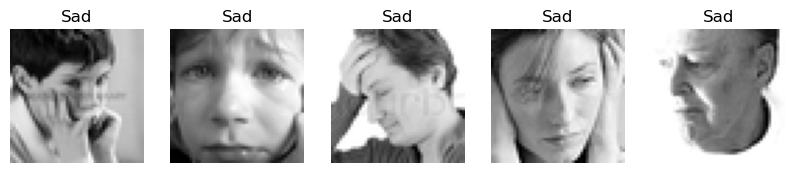

In [43]:
import matplotlib.pyplot as plt
import cv2
import os

# ✅ Function to show first 5 images from the "sad" category
def show_sad_images(folder_path, num_images=5):
    sad_folder = os.path.join(folder_path, "sad")  # Path to "sad" folder
    
    if not os.path.exists(sad_folder):
        print("❌ Error: 'sad' category not found in dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    count = 0
    for img_name in os.listdir(sad_folder):  # Iterate through images in "sad" folder
        img_path = os.path.join(sad_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        
        if img is None:
            continue  # Skip corrupted images
        
        plt.subplot(1, num_images, count+1)
        plt.imshow(img, cmap="gray")
        plt.title("Sad")  # Set title as "Sad"
        plt.axis("off")
        
        count += 1
        if count >= num_images:
            break  # Stop after 5 images
    
    plt.show()

# ✅ Call the function to show first 5 "Sad" images from training dataset
show_sad_images(train_dir, num_images=5)


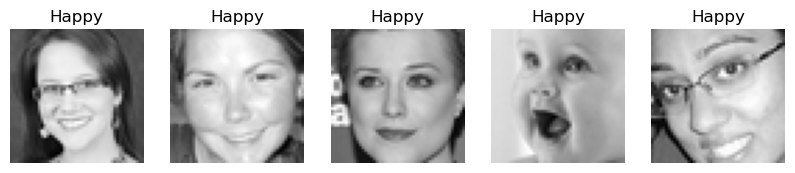

In [44]:
import matplotlib.pyplot as plt
import cv2
import os

# ✅ Function to show first 5 images from the "happy" category
def show_happy_images(folder_path, num_images=5):
    happy_folder = os.path.join(folder_path, "happy")  # Path to "happy" folder
    
    if not os.path.exists(happy_folder):
        print("❌ Error: 'happy' category not found in dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    count = 0
    for img_name in os.listdir(happy_folder):  # Iterate through images in "happy" folder
        img_path = os.path.join(happy_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        
        if img is None:
            continue  # Skip corrupted images
        
        plt.subplot(1, num_images, count+1)
        plt.imshow(img, cmap="gray")
        plt.title("Happy")  # Set title as "Happy"
        plt.axis("off")
        
        count += 1
        if count >= num_images:
            break  # Stop after 5 images
    
    plt.show()

# ✅ Call the function to show first 5 "Happy" images from training dataset
show_happy_images(train_dir, num_images=5)


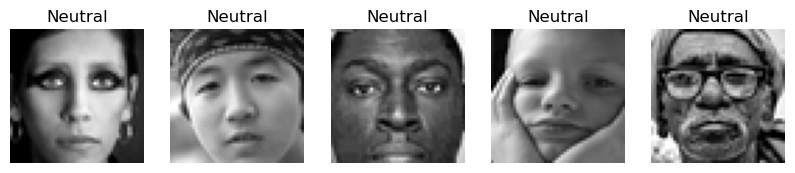

In [45]:
import matplotlib.pyplot as plt
import cv2
import os

# ✅ Function to show first 5 images from the "neutral" category
def show_neutral_images(folder_path, num_images=5):
    neutral_folder = os.path.join(folder_path, "neutral")  # Path to "neutral" folder
    
    if not os.path.exists(neutral_folder):
        print("❌ Error: 'neutral' category not found in dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    count = 0
    for img_name in os.listdir(neutral_folder):  # Iterate through images in "neutral" folder
        img_path = os.path.join(neutral_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        
        if img is None:
            continue  # Skip corrupted images
        
        plt.subplot(1, num_images, count+1)
        plt.imshow(img, cmap="gray")
        plt.title("Neutral")  # Set title as "Neutral"
        plt.axis("off")
        
        count += 1
        if count >= num_images:
            break  # Stop after 5 images
    
    plt.show()

# ✅ Call the function to show first 5 "Neutral" images from training dataset
show_neutral_images(train_dir, num_images=5)


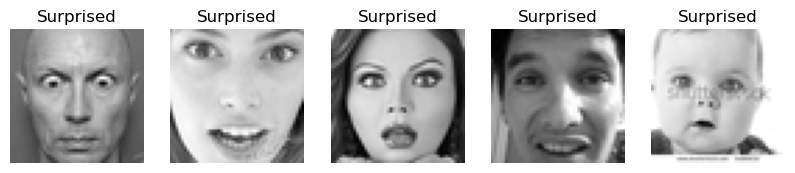

In [46]:
import matplotlib.pyplot as plt
import cv2
import os

# ✅ Function to show first 5 images from the "surprised" category
def show_surprised_images(folder_path, num_images=5):
    surprised_folder = os.path.join(folder_path, "surprised")  # Path to "surprised" folder
    
    if not os.path.exists(surprised_folder):
        print("❌ Error: 'surprised' category not found in dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    count = 0
    for img_name in os.listdir(surprised_folder):  # Iterate through images in "surprised" folder
        img_path = os.path.join(surprised_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        
        if img is None:
            continue  # Skip corrupted images
        
        plt.subplot(1, num_images, count+1)
        plt.imshow(img, cmap="gray")
        plt.title("Surprised")  # Set title as "Surprised"
        plt.axis("off")
        
        count += 1
        if count >= num_images:
            break  # Stop after 5 images
    
    plt.show()

# ✅ Call the function to show first 5 "Surprised" images from training dataset
show_surprised_images(train_dir, num_images=5)


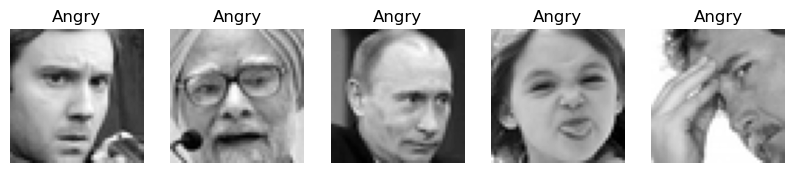

In [47]:
import matplotlib.pyplot as plt
import cv2
import os

def show_angry_images(folder_path, num_images=5):
    angry_folder = os.path.join(folder_path, "angry")
    
    if not os.path.exists(angry_folder):
        print("❌ Error: 'angry' category not found in dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    count = 0
    for img_name in os.listdir(angry_folder):
        img_path = os.path.join(angry_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            continue
        
        plt.subplot(1, num_images, count+1)
        plt.imshow(img, cmap="gray")
        plt.title("Angry")
        plt.axis("off")
        
        count += 1
        if count >= num_images:
            break
    
    plt.show()

# Call the function
show_angry_images(train_dir, num_images=5)

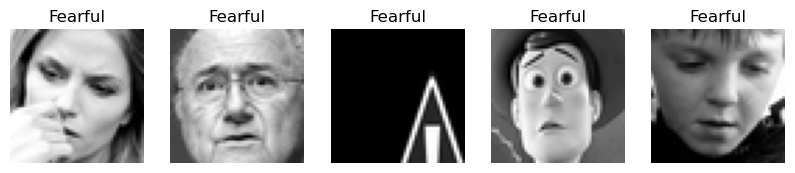

In [48]:
def show_fearful_images(folder_path, num_images=5):
    fearful_folder = os.path.join(folder_path, "fearful")
    
    if not os.path.exists(fearful_folder):
        print("❌ Error: 'fearful' category not found in dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    count = 0
    for img_name in os.listdir(fearful_folder):
        img_path = os.path.join(fearful_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            continue
        
        plt.subplot(1, num_images, count+1)
        plt.imshow(img, cmap="gray")
        plt.title("Fearful")
        plt.axis("off")
        
        count += 1
        if count >= num_images:
            break
    
    plt.show()

# Call the function
show_fearful_images(train_dir, num_images=5)

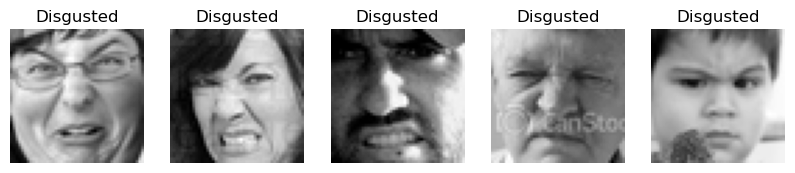

In [49]:
def show_disgusted_images(folder_path, num_images=5):
    disgusted_folder = os.path.join(folder_path, "disgusted")
    
    if not os.path.exists(disgusted_folder):
        print("❌ Error: 'disgusted' category not found in dataset.")
        return
    
    plt.figure(figsize=(10, 5))
    
    count = 0
    for img_name in os.listdir(disgusted_folder):
        img_path = os.path.join(disgusted_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            continue
        
        plt.subplot(1, num_images, count+1)
        plt.imshow(img, cmap="gray")
        plt.title("Disgusted")
        plt.axis("off")
        
        count += 1
        if count >= num_images:
            break
    
    plt.show()

# Call the function
show_disgusted_images(train_dir, num_images=5)
